# Introduction to High-Frequency Trading (HFT)

## 1.1 Definition and Key Characteristics

### What is High-Frequency Trading (HFT)?
- **Definition**: High-Frequency Trading is a type of algorithmic trading characterized by high speeds, high turnover rates, and high order-to-trade ratios. It involves the use of sophisticated technological tools and computer algorithms to rapidly trade securities.
  
### Key Characteristics of HFT
- **Speed**: Trades are executed within microseconds or milliseconds.
- **Volume**: High volume of trades in a short period.
- **Turnover Rate**: Positions are held for very short periods, often seconds or less.
- **Order-to-Trade Ratio**: High number of orders placed compared to the number of trades executed.

## 1.2 History and Evolution of HFT

### Early Beginnings
- **1970s-1980s**: Introduction of electronic trading and stock exchanges moving to automated systems.
- **1983**: NASDAQ introduces a Small Order Execution System (SOES), a precursor to HFT.

### Milestones in HFT Development
- **1998**: SEC allows electronic exchanges, leading to the rise of electronic communication networks (ECNs).
- **2000s**: Significant growth in HFT firms; advancements in technology and algorithms.
- **2010**: The Flash Crash - a rapid and severe market drop and recovery within minutes, highlighting the impact of HFT.

### Recent Trends
- **Post-2010**: Increased regulation and scrutiny; ongoing advancements in technology continue to drive HFT.

## 1.3 Comparison with Other Types of Algorithmic Trading

### Algorithmic Trading Overview
- **Algorithmic Trading**: The use of computer algorithms to automate trading decisions and execute trades.
  
### Types of Algorithmic Trading
- **Low-Frequency Trading (LFT)**: Longer holding periods, fewer trades, focus on larger gains per trade.
- **Medium-Frequency Trading (MFT)**: Holding periods ranging from minutes to days, moderate number of trades.

### Key Differences Between HFT and Other Types
- **Speed and Latency**: HFT focuses on extremely low latency and high-speed execution, unlike LFT and MFT.
- **Volume and Turnover**: HFT has significantly higher trade volumes and turnover rates.
- **Technological Requirements**: HFT requires advanced technological infrastructure and low-latency networks.



# HFT Strategies

## 2.1 Market Making

### Explanation and Examples
- **Market Making**: A strategy where traders provide liquidity to the market by continuously buying and selling securities, profiting from the bid-ask spread.
- **Examples**:
  - **Quoting Prices**: Posting buy and sell orders for a security to profit from the difference between the bid and ask prices.
  - **Adaptive Market Making**: Adjusting quotes based on market conditions, order flow, and inventory levels.

### Role in Providing Liquidity
- **Liquidity Provision**: Market makers play a crucial role in ensuring market liquidity, allowing for smoother and more efficient trading.
- **Reducing Spread**: By providing consistent buy and sell orders, market makers help narrow the bid-ask spread, benefiting all market participants.

## 2.2 Arbitrage

### Statistical Arbitrage
- **Concept**: Identifying and exploiting price discrepancies between related securities based on statistical models.
- **Execution**: Using historical price data and statistical techniques to predict and capitalize on short-term price movements.

### Cross-Exchange Arbitrage
- **Concept**: Exploiting price differences of the same asset traded on different exchanges.
- **Execution**: Simultaneously buying the asset on the cheaper exchange and selling it on the more expensive one to lock in profits.

### Latency Arbitrage
- **Concept**: Taking advantage of delays in price updates between exchanges or trading platforms.
- **Execution**: Using faster data feeds and low-latency execution systems to trade on stale prices before the market adjusts.

## 2.3 Momentum Trading

### Concepts and Mechanisms
- **Momentum Trading**: A strategy that capitalizes on the continuation of existing market trends.
- **Mechanisms**:
  - **Trend Following**: Identifying and trading in the direction of prevailing market trends.
  - **Pattern Recognition**: Using algorithms to detect and act on specific price patterns indicative of momentum.

### Identifying Momentum in High-Frequency Data
- **Technical Indicators**: Utilizing indicators such as moving averages, Relative Strength Index (RSI), and MACD to detect momentum.
- **Algorithmic Models**: Developing models that analyze high-frequency data to predict short-term price movements based on momentum signals.




## 2.4 Example: Market Making Strategy Backtest in Python

### Strategy Overview
In this example, we will implement a simple market making strategy that continuously places buy and sell orders around the current market price. The goal is to profit from the bid-ask spread. The strategy will be backtested using historical data.

### Python Code

1. **Fetching Data**: Intraday historical data for Apple Inc. (AAPL) is fetched from Yahoo Finance using the `yfinance` library.
2. **Parameters**: Key parameters include the bid-ask spread, position size, and initial cash balance.
3. **Initialization**: Variables for cash, inventory, and trade log are initialized.
4. **Order Execution Assumptions**: 
    - For buy orders, the order is assumed to be executed if the price in the next interval is lower than the buy price.
    - For sell orders, the order is assumed to be executed if the price in the next interval is higher than the sell price.
5. **Final Portfolio Value**: After the loop, the final portfolio value is calculated by adding the remaining cash and the value of the inventory.
6. **Results**: The initial cash, final portfolio value, and total profit or loss are printed.
7. **Plotting**: The market price and trade actions (buy and sell orders) are plotted for visualization.

These assumptions help ensure that orders are executed in a realistic manner, accounting for market conditions and liquidity.

[*********************100%%**********************]  1 of 1 completed

Initial Cash: $100000
Final Portfolio Value: $98865.97880859961
Total P&L: $-1134.0211914003885


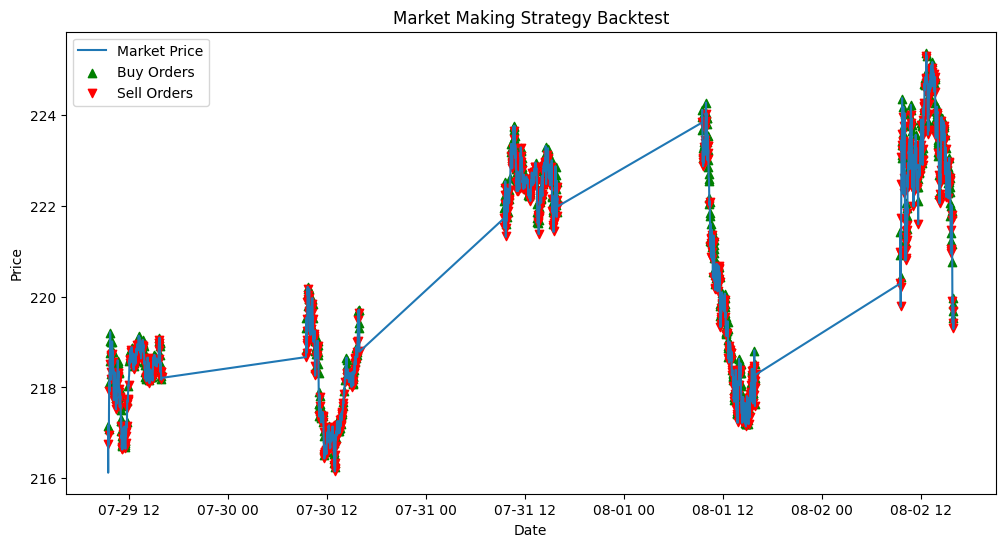

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch intraday historical data from Yahoo Finance
ticker = 'AAPL'
data = yf.download(tickers=ticker, period='5d', interval='1m')
data = data[['Close']]
data.columns = ['close']

# Parameters
spread = 0.02  # Bid-ask spread
position_size = 10  # Number of shares per order
initial_cash = 100000  # Initial cash balance

# Initialize variables
cash = initial_cash
inventory = 0
trade_log = []

# Backtesting loop
for i in range(1, len(data)):
    current_price = data['close'].iloc[i]
    previous_price = data['close'].iloc[i-1]

    # Assume orders are executed if the price moves through the order level
    # Place buy order
    buy_price = current_price - (spread / 2)
    if cash >= buy_price * position_size:
        # Check if the low price of the next interval is below the buy price
        if i < len(data) - 1 and data['close'].iloc[i+1] < buy_price:
            cash -= buy_price * position_size
            inventory += position_size
            trade_log.append(('buy', data.index[i], buy_price, position_size))
    
    # Place sell order
    sell_price = current_price + (spread / 2)
    if inventory >= position_size:
        # Check if the high price of the next interval is above the sell price
        if i < len(data) - 1 and data['close'].iloc[i+1] > sell_price:
            cash += sell_price * position_size
            inventory -= position_size
            trade_log.append(('sell', data.index[i], sell_price, position_size))

# Calculate final portfolio value
final_portfolio_value = cash + inventory * data['close'].iloc[-1]

# Print results
print(f'Initial Cash: ${initial_cash}')
print(f'Final Portfolio Value: ${final_portfolio_value}')
print(f'Total P&L: ${final_portfolio_value - initial_cash}')

# Plot results
trades = pd.DataFrame(trade_log, columns=['type', 'datetime', 'price', 'size'])
trades.set_index('datetime', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Market Price')
plt.scatter(trades[trades['type'] == 'buy'].index, trades[trades['type'] == 'buy']['price'], color='green', marker='^', label='Buy Orders')
plt.scatter(trades[trades['type'] == 'sell'].index, trades[trades['type'] == 'sell']['price'], color='red', marker='v', label='Sell Orders')
plt.title('Market Making Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 2.5 Example: Latency arbitrage

### Strategy Overview
In this example, we will simulate latency arbitrage by comparing the prices from two different data sources. When a price discrepancy is detected, the strategy will trade to profit from the difference.

1. **Fetching Data**: Intraday historical data for Apple Inc. (AAPL) is fetched from Yahoo Finance using the `yfinance` library.
2. **Simulating Latency**: A second data source is simulated by shifting the original data by one minute to represent latency.
3. **Parameters**: Key parameters include the spread threshold for arbitrage opportunities, position size, and initial cash balance.
4. **Initialization**: Variables for cash, inventory, and trade log are initialized.
5. **Backtesting Loop**:
    - The loop iterates through each price point, comparing prices from the two data sources.
    - If a price discrepancy greater than the spread threshold is detected, the strategy trades to profit from the difference.
6. **Final Portfolio Value**: After the loop, the final portfolio value is calculated by adding the remaining cash and the value of the inventory.
7. **Results**: The initial cash, final portfolio value, and total profit or loss are printed.
8. **Plotting**: The market price and trade actions (buy and sell orders) are plotted for visualization.

This example provides a framework for implementing and backtesting a latency arbitrage strategy using real intraday data from Yahoo Finance in Python.

### Python Code




[*********************100%%**********************]  1 of 1 completed

Initial Cash: $100000
Final Portfolio Value: $102613.73046875
Total P&L: $2613.73046875



/var/folders/nw/2gg15y3x1sn5zt7f1pt9lmzr0000gp/T/ipykernel_52532/2849911689.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2 = data1.shift(1).fillna(method='bfill')  # Shift data by one minute to simulate latency


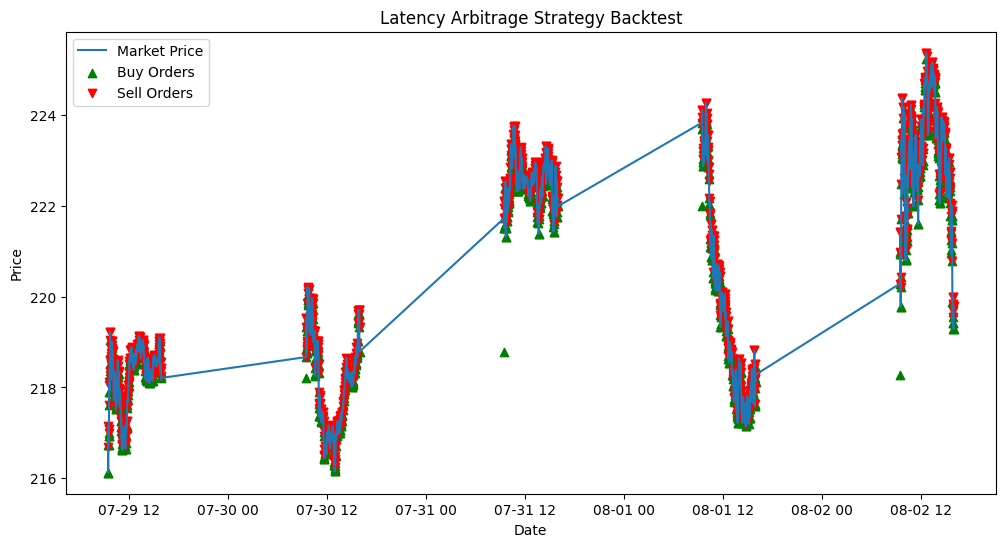

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch intraday historical data from Yahoo Finance
ticker = 'AAPL'
data1 = yf.download(tickers=ticker, period='5d', interval='1m')
data1 = data1[['Close']]
data1.columns = ['close']

# Simulate a second data source with slight delay (latency)
data2 = data1.shift(1).fillna(method='bfill')  # Shift data by one minute to simulate latency

# Parameters
spread_threshold = 0.05  # Minimum price difference to execute arbitrage
position_size = 10  # Number of shares per order
initial_cash = 100000  # Initial cash balance

# Initialize variables
cash = initial_cash
inventory = 0
trade_log = []

# Backtesting loop
for i in range(1, len(data1)):
    price1 = data1['close'].iloc[i]
    price2 = data2['close'].iloc[i]

    # Check for arbitrage opportunity
    if abs(price1 - price2) >= spread_threshold:
        # If price1 is higher, sell at price1 and buy at price2
        if price1 > price2:
            if inventory >= position_size:
                cash += price1 * position_size
                inventory -= position_size
                trade_log.append(('sell', data1.index[i], price1, position_size))
            if cash >= price2 * position_size:
                cash -= price2 * position_size
                inventory += position_size
                trade_log.append(('buy', data1.index[i], price2, position_size))
        # If price2 is higher, buy at price1 and sell at price2
        else:
            if cash >= price1 * position_size:
                cash -= price1 * position_size
                inventory += position_size
                trade_log.append(('buy', data1.index[i], price1, position_size))
            if inventory >= position_size:
                cash += price2 * position_size
                inventory -= position_size
                trade_log.append(('sell', data1.index[i], price2, position_size))

# Calculate final portfolio value
final_portfolio_value = cash + inventory * data1['close'].iloc[-1]

# Print results
print(f'Initial Cash: ${initial_cash}')
print(f'Final Portfolio Value: ${final_portfolio_value}')
print(f'Total P&L: ${final_portfolio_value - initial_cash}')

# Plot results
trades = pd.DataFrame(trade_log, columns=['type', 'datetime', 'price', 'size'])
trades.set_index('datetime', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data1['close'], label='Market Price')
plt.scatter(trades[trades['type'] == 'buy'].index, trades[trades['type'] == 'buy']['price'], color='green', marker='^', label='Buy Orders')
plt.scatter(trades[trades['type'] == 'sell'].index, trades[trades['type'] == 'sell']['price'], color='red', marker='v', label='Sell Orders')
plt.title('Latency Arbitrage Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# 3. Technology and Infrastructure in HFT

## 3.1 Hardware

### Importance of Low-Latency Hardware
- **Low-Latency Execution**: HFT strategies require executing trades in microseconds or milliseconds. Low-latency hardware reduces the time it takes for trades to be processed.
- **Competitive Edge**: Faster execution times provide a competitive edge in capturing market opportunities before other participants.

### Examples of High-Performance Computing Setups
- **Custom-Built Servers**: Servers optimized for speed, with high-frequency CPUs, low-latency memory, and SSDs.
- **Graphics Processing Units (GPUs)**: Used for parallel processing tasks and complex computations.
- **Field Programmable Gate Arrays (FPGAs)**: Hardware accelerators that can be programmed to perform specific trading functions at high speed.

## 3.2 Networking

### Role of Low-Latency Networks
- **Data Transmission Speed**: The speed at which data is transmitted between trading venues and trading systems is critical.
- **Network Optimization**: Using low-latency network connections and optimizing routing paths to reduce transmission time.

### Fiber Optic Cables vs. Microwave Transmission
- **Fiber Optic Cables**: Provide high-speed, reliable data transmission but can have higher latency due to longer physical paths.
- **Microwave Transmission**: Offers lower latency as microwave signals travel in straight lines, reducing the physical distance. Used for ultra-low latency communication between trading centers.

## 3.3 Software

### Optimized Algorithms and Code Efficiency
- **Algorithm Optimization**: Writing efficient algorithms that minimize computational overhead and execute quickly.
- **Low-Level Programming Languages**: Using languages like C++ and assembly for critical path code to ensure minimal latency.
- **Concurrency and Parallelism**: Implementing multi-threading and parallel processing to handle large volumes of data and execute multiple tasks simultaneously.

### Use of FPGA (Field Programmable Gate Arrays)
- **Hardware Acceleration**: FPGAs can be programmed to perform specific trading tasks at hardware speed, significantly reducing latency.
- **Customization**: FPGAs can be tailored to specific trading strategies and updated as needed.

## 3.4 Data Management

### Data Sources
- **Market Data**: Real-time and historical data from exchanges, including price, volume, and order book data.
- **Order Book Data**: Detailed information about current buy and sell orders in the market, essential for many HFT strategies.

### Importance of Real-Time Data
- **Timeliness**: Access to real-time data ensures that trading decisions are based on the most current market conditions.
- **Accuracy**: High-quality real-time data reduces the risk of making decisions based on outdated or incorrect information.

### Data Storage and Access
- **Low-Latency Data Access**: Storing data in a way that allows for rapid retrieval and processing is crucial for HFT.
- **In-Memory Databases**: Using in-memory databases to store and access data at high speed.


# 4. Data Management in HFT

## 4.1 Data Sources

### Types of Data Used in HFT
- **Market Data**: Includes price, volume, and trade data for securities. It is the primary input for most HFT strategies.
- **Order Book Data**: Detailed information about all buy and sell orders in the market. It provides a deeper insight into market depth and liquidity.
- **News Data**: Real-time news feeds that can impact security prices. HFT strategies may use this data for sentiment analysis and event-driven trading.
- **Economic Data**: Macro-economic indicators and announcements that can influence market movements.
- **Tick Data**: The finest granularity of data, capturing every trade and quote change.

### Comparison of L1, L2, and L3 Data

The table below presents a detailed comparison of Level 1 (L1), Level 2 (L2), and Level 3 (L3) data, highlighting their main characteristics, content, use cases, data volume, latency sensitivity, data examples, and complexity, which are essential for understanding their respective roles in high-frequency trading.


![Order Book Data Levels](l1l2l3data.png)



| Feature                 | Level 1 (L1)                 | Level 2 (L2)                 | Level 3 (L3)                                    |
|-------------------------|------------------------------|------------------------------|-------------------------------------------------|
| **Description**         | Top of Book Data             | Market Depth Data            | Full Order Book Data                            |
| **Content**             | Best bid and ask prices      | Bid and ask prices at multiple levels (depth) | All orders and their status (every quote and trade) |
| **Use Case**            | Basic trading strategies, price tracking | Market making, liquidity analysis, more advanced trading strategies | Detailed market analysis, high-frequency trading, arbitrage |
| **Data Volume**         | Low                          | Medium                       | High                                            |
| **Latency Sensitivity** | Low                          | Medium                       | High                                            |
| **Data Example**        | Bid: $100, Ask: $101         | 5 levels of bids and asks    | All orders including cancellations and modifications |
| **Complexity**          | Low                          | Medium                       | High                                            |

## 4.2 Importance of Real-Time Data
- **Timeliness**: Access to the most current market data is crucial for making informed trading decisions and capturing fleeting market opportunities.
- **Accuracy**: Ensures that trading algorithms act on the latest and most accurate market conditions, reducing the risk of outdated information leading to losses.
- **Competitive Advantage**: Faster access to real-time data can provide a significant edge in executing trades before other market participants.

## 4.3 Data Storage and Access

### Low-Latency Data Access
- **Requirement**: HFT strategies need to retrieve and process data in microseconds or milliseconds.
- **Techniques**:
  - **Caching**: Storing frequently accessed data in high-speed cache memory.
  - **Preloading**: Loading critical data into memory before it is needed.
  - **Efficient Data Structures**: Using data structures that allow for quick access and modification, such as hash tables.

### In-Memory Databases
- **Advantages**:
  - **Speed**: Data is stored in RAM, providing faster read and write times compared to disk-based storage.
  - **Performance**: Ideal for applications requiring real-time data processing and analysis.
  - **Scalability**: Can handle large volumes of data efficiently, making them suitable for the high demands of HFT.
- **Examples**:
  - **Redis**: An in-memory data structure store used as a database, cache, and message broker.
  - **Memcached**: A high-performance, distributed memory object caching system.
  - **Apache Ignite**: An in-memory computing platform that provides high-performance, distributed memory-centric storage and processing.


### Comparison of In-Memory Databases

The table below presents a detailed comparison of Redis, Apache Ignite, and kdb+, highlighting their main characteristics, strengths, use cases, and other relevant features for high-frequency trading applications.

| Feature                     | Redis                                              | Apache Ignite                                    | kdb+                                              |
|-----------------------------|----------------------------------------------------|--------------------------------------------------|---------------------------------------------------|
| **Primary Use Case**        | Key-Value Store, Cache, Message Broker             | Distributed Database, In-Memory Computing        | Time-Series Database, Real-Time Analytics         |
| **Data Model**              | Key-Value, Hashes, Lists, Sets, Sorted Sets, etc.  | Key-Value, SQL, ACID Transactions                | Columnar, Time-Series                             |
| **Performance**             | High Performance, Low Latency                      | High Performance, Scalable                       | Extremely High Performance for Time-Series        |
| **Scalability**             | Horizontally Scalable with Redis Cluster           | Horizontally Scalable, Distributed Processing    | Limited Horizontal Scalability, Highly Optimized  |
| **Persistence**             | In-Memory with optional Disk Persistence (RDB, AOF)| In-Memory with optional Disk Persistence         | Primarily In-Memory with Disk Storage Options     |
| **Programming Language**    | C                                                  | Java, C++                                        | Q (proprietary language), C                       |
| **Transactions**            | Support for Transactions                           | ACID Transactions                                | Limited Transaction Support                       |
| **Complexity**              | Easy to Set Up and Use                             | Medium Complexity                                | High Complexity (Specialized Knowledge Required)  |
| **Popular Use Cases**       | Caching, Session Management, Real-Time Analytics   | Distributed Caching, Real-Time Processing, OLTP  | High-Frequency Trading, Financial Analytics       |
| **Community and Support**   | Large Community, Extensive Documentation           | Active Community, Good Documentation             | Smaller Community, Specialized Support            |
| **Integration**             | Wide Integration with Various Tools and Languages  | Integration with Hadoop, Spark, etc.             | Integration with Python (via qPython), APIs       |
| **License**                 | Open Source (BSD)                                  | Open Source (Apache 2.0)                         | Proprietary with Free 32-bit Version              |
| **Example Code**            | See Redis Example Below                            | See Apache Ignite Example Below                  | See kdb+ Example Below                            |

### Example Code for Each In-Memory Database

#### Redis Example
```python
import redis

# Connect to Redis
r = redis.Redis(host='localhost', port=6379, db=0)

# Storing data in Redis
r.set('foo', 'bar')
print(r.get('foo'))  # Output: b'bar'

# Example of storing a Python dictionary
data = {'key1': 'value1', 'key2': 'value2'}
r.hmset('my_dict', data)
print(r.hgetall('my_dict'))  # Output: {b'key1': b'value1', b'key2': b'value2'}

# Example of using Redis as a cache
def get_data_from_cache(key):
    data = r.get(key)
    if data:
        return data
    else:
        # Simulate data retrieval from a slower database
        data = "data_from_database"
        r.set(key, data)
        return data

print(get_data_from_cache('my_key'))  # Output: b'data_from_database'
```


#### kdb Example
```python
from qpython import qconnection
from qpython.qtype import QException

# Connect to kdb+ server
q = qconnection.QConnection(host='localhost', port=5000)
q.open()

# Store data in kdb+
try:
    q('{`trade insert (`time`sym`price`size)!(.z.p;`AAPL;150.0;100)}')
    q.sync()
except QException as e:
    print(f'Error: {e}')

# Retrieve data from kdb+
try:
    result = q('select from trade where sym=`AAPL')
    print(result)
except QException as e:
    print(f'Error: {e}')

# Close the connection
q.close()
```




# 5. Risk Management in HFT

## 5.1 Types of Risks in HFT

### Market Risk
- **Definition**: Market risk refers to the potential for losses due to adverse movements in market prices. This can include sudden price drops or spikes that negatively affect trading positions.
- **Examples**:
  - **Price Volatility**: Rapid changes in price can lead to significant losses if positions are not managed properly.
  - **Liquidity Risk**: Inability to exit positions quickly without significantly impacting the market price.

### Operational Risk
- **Definition**: Operational risk arises from failures in internal processes, systems, or external events. This can include software bugs, hardware failures, and human errors.
- **Examples**:
  - **System Failures**: Hardware or software malfunctions that prevent orders from being executed.
  - **Human Errors**: Mistakes made by traders or developers, such as incorrect order sizes or erroneous code changes.

### Latency Risk
- **Definition**: Latency risk involves the delays in data transmission and order execution, which can lead to missed opportunities or unfavorable trade executions.
- **Examples**:
  - **Network Delays**: Slow data transmission between trading systems and exchanges.
  - **Processing Delays**: Time taken to process and execute orders within trading algorithms.

## 5.2 Risk Mitigation Strategies

### Real-Time Monitoring
- **Importance**: Continuous monitoring of trading activities and system performance is crucial to identify and address issues promptly.
- **Implementation**:
  - **Dashboards and Alerts**: Use of real-time dashboards and alerting systems to track key metrics such as latency, order execution times, and system health.
  - **Automated Monitoring Tools**: Deployment of automated tools to monitor market conditions, trading performance, and system stability.

### Circuit Breakers and Kill Switches
- **Circuit Breakers**:
  - **Definition**: Mechanisms that temporarily halt trading to prevent panic selling or buying during extreme market conditions.
  - **Usage**: Automatically triggered based on predefined thresholds, such as significant price drops or spikes.
  - **Benefits**: Helps to maintain market stability and prevent cascading failures.
  
- **Kill Switches**:
  - **Definition**: Emergency stop mechanisms that can instantly halt all trading activities.
  - **Usage**: Manually or automatically activated in response to critical issues, such as major system failures or detected anomalies in trading behavior.
  - **Benefits**: Provides a safety net to prevent catastrophic losses and system damage.

### Diversification of Strategies
- **Importance**: Reducing dependence on a single strategy can minimize risk exposure.
- **Implementation**:
  - **Multiple Strategies**: Employing a variety of trading strategies that respond differently to market conditions.
  - **Asset Class Diversification**: Trading across different asset classes (equities, FX, commodities) to spread risk.

### Regular Audits and Stress Testing
- **Importance**: Ensuring the robustness of trading systems and strategies through regular reviews and testing.
- **Implementation**:
  - **Code Reviews**: Periodic audits of trading algorithms and system code to identify and rectify potential issues.
  - **Stress Testing**: Simulating extreme market conditions to assess the system's resilience and identify vulnerabilities.

### Risk Limits and Controls
- **Importance**: Establishing risk limits and controls to prevent excessive risk-taking.
- **Implementation**:
  - **Position Limits**: Setting maximum allowable positions for different assets and strategies.
  - **Risk Exposure Limits**: Defining maximum exposure limits to ensure that losses do not exceed acceptable levels.

## 5.3 Risk Metrics

### Different Risk Metrics Used in HFT

| Risk Metric                   | Description                                                                                     | Calculation Example                                             | Use Case                                                         |
|-------------------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|-----------------------------------------------------------------|
| **Value at Risk (VaR)**       | Measures the maximum potential loss over a specified time period with a given confidence level. | VaR = Historical or Monte Carlo Simulation                      | Assessing the potential loss in the portfolio.                  |
| **Expected Shortfall (ES)**   | Also known as Conditional VaR, measures the expected loss beyond the VaR threshold.            | ES = Average of losses exceeding VaR                            | Evaluating worst-case scenarios and tail risks.                 |
| **Sharpe Ratio**              | Measures the risk-adjusted return of an investment.                                             | Sharpe Ratio = (Return - Risk-Free Rate) / Standard Deviation   | Comparing the performance of different strategies or portfolios.|
| **Drawdown**                  | Measures the peak-to-trough decline in the portfolio value.                                     | Drawdown = Peak Value - Trough Value                            | Understanding the potential loss magnitude over time.           |
| **Beta**                      | Measures the portfolio's sensitivity to market movements.                                       | Beta = Covariance(Portfolio, Market) / Variance(Market)         | Assessing the portfolio's market risk exposure.                 |
| **Alpha**                     | Measures the excess return of the portfolio relative to the market.                             | Alpha = Portfolio Return - (Beta * Market Return)               | Evaluating the performance of a trading strategy.               |
| **Sortino Ratio**             | Similar to the Sharpe Ratio, but only considers downside volatility.                            | Sortino Ratio = (Return - Risk-Free Rate) / Downside Deviation  | Measuring risk-adjusted return while penalizing only downside risk. |
| **Treynor Ratio**             | Measures returns earned in excess of that which could have been earned on a risk-free investment per each unit of market risk. | Treynor Ratio = (Return - Risk-Free Rate) / Beta                | Evaluating the performance of a portfolio with respect to market risk. |
| **Maximum Drawdown**          | The maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. | Max Drawdown = Max(Peak - Trough) / Peak                        | Assessing the worst-case scenario in terms of losses.           |
| **Information Ratio**         | Measures the returns of the portfolio above the returns of a benchmark, adjusted by the volatility of those returns. | Information Ratio = (Portfolio Return - Benchmark Return) / Tracking Error | Comparing the performance of a portfolio to a benchmark.        |
| **Tracking Error**            | Measures how closely a portfolio follows the index to which it is benchmarked.                  | Tracking Error = Standard Deviation of (Portfolio Return - Benchmark Return) | Assessing the deviation of a portfolio from its benchmark.      |
| **R-squared**                 | Measures the percentage of a portfolio's movements that can be explained by movements in a benchmark index. | R-squared = 1 - (Residual Variance / Total Variance)           | Determining how well a portfolio tracks its benchmark.          |

## 5.4 Python Backtesting Example

### Backtesting with Risk Metrics

The following Python code demonstrates a backtesting example incorporating multiple risk metrics, including VaR, Sharpe Ratio, Sortino Ratio, and Maximum Drawdown.

#### Python Code Example


[*********************100%%**********************]  1 of 1 completed

Initial Cash: $100000
Final Portfolio Value: $96722.50015258789
Total Return: -3.28%
VaR (99% confidence): -1.93%
VaR (95% confidence): -0.71%
Expected Shortfall (99% confidence): -2.05%
Expected Shortfall (95% confidence): -1.51%
Sharpe Ratio: -1.73
Sortino Ratio: -1.62
Maximum Drawdown: -6.66%


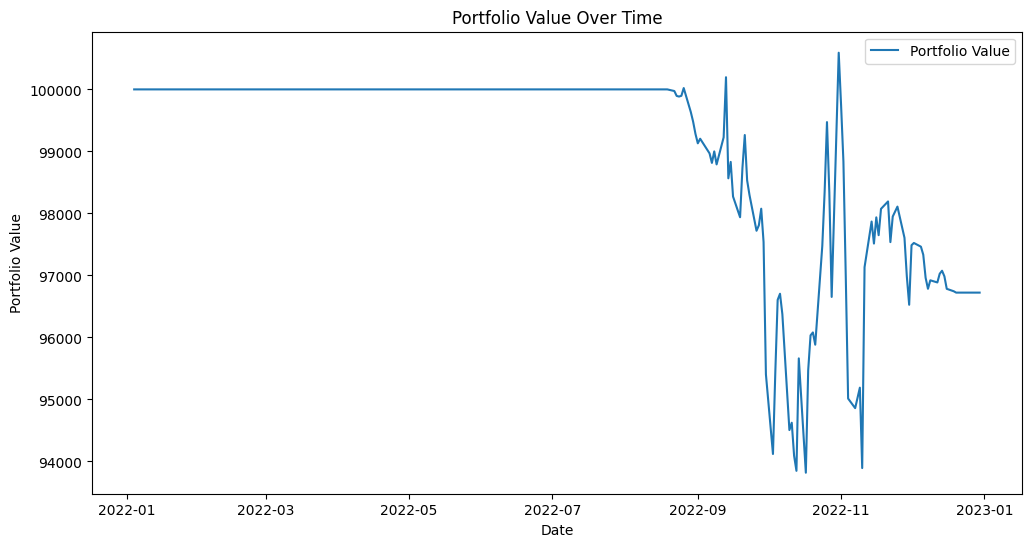

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Fetch historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data['Return'] = data['Close'].pct_change().dropna()

# Parameters
initial_cash = 100000
position_size = 10
cash = initial_cash
inventory = 0
portfolio_values = [initial_cash]
returns = []

# Backtesting loop
for i in range(1, len(data)):
    current_price = data['Close'].iloc[i]
    previous_price = data['Close'].iloc[i-1]

    # Simulated trading logic: simple moving average crossover strategy
    short_window = 40
    long_window = 100
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

    if data['Short_MA'].iloc[i] > data['Long_MA'].iloc[i] and cash >= current_price * position_size:
        # Buy signal
        cash -= current_price * position_size
        inventory += position_size
    elif data['Short_MA'].iloc[i] < data['Long_MA'].iloc[i] and inventory >= position_size:
        # Sell signal
        cash += current_price * position_size
        inventory -= position_size

    # Calculate portfolio value
    portfolio_value = cash + inventory * current_price
    portfolio_values.append(portfolio_value)
    daily_return = (portfolio_value - portfolio_values[-2]) / portfolio_values[-2]
    returns.append(daily_return)

# Convert lists to numpy arrays for calculations
portfolio_values = np.array(portfolio_values)
returns = np.array(returns)

# Risk Metrics Calculation
# Value at Risk (VaR)
VaR_99 = np.percentile(returns, 1)
VaR_95 = np.percentile(returns, 5)

# Expected Shortfall (ES)
ES_99 = returns[returns <= VaR_99].mean()
ES_95 = returns[returns <= VaR_95].mean()

# Sharpe Ratio
risk_free_rate = 0.01
sharpe_ratio = (np.mean(returns) - risk_free_rate) / np.std(returns)

# Sortino Ratio
downside_deviation = np.std([r for r in returns if r < 0])
sortino_ratio = (np.mean(returns) - risk_free_rate) / downside_deviation

# Maximum Drawdown
drawdowns = portfolio_values / np.maximum.accumulate(portfolio_values) - 1
max_drawdown = drawdowns.min()

# Print risk metrics
print(f'Initial Cash: ${initial_cash}')
print(f'Final Portfolio Value: ${portfolio_values[-1]}')
print(f'Total Return: {(portfolio_values[-1] - initial_cash) / initial_cash * 100:.2f}%')
print(f'VaR (99% confidence): {VaR_99 * 100:.2f}%')
print(f'VaR (95% confidence): {VaR_95 * 100:.2f}%')
print(f'Expected Shortfall (99% confidence): {ES_99 * 100:.2f}%')
print(f'Expected Shortfall (95% confidence): {ES_95 * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index[1:], portfolio_values[:-1], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


### Risk Metrics Comparison for Three Strategies

| Strategy         | Total Return (%) | VaR (99%) (%) | VaR (95%) (%) | Expected Shortfall (99%) (%) | Expected Shortfall (95%) (%) | Sharpe Ratio | Sortino Ratio | Maximum Drawdown (%) |
|------------------|------------------|---------------|---------------|------------------------------|------------------------------|--------------|---------------|----------------------|
| Strategy A       | 12.5             | -3.2          | -2.1          | -4.5                         | -3.2                         | 1.5          | 2.0           | -12.0                |
| Strategy B       | 8.0              | -2.5          | -1.8          | -3.8                         | -2.5                         | 1.8          | 2.4           | -8.5                 |
| Strategy C       | 15.0             | -4.0          | -2.8          | -5.5                         | -3.8                         | 1.2          | 1.6           | -15.0                |

### Explanation of the Table

- **Total Return (%)**: The overall percentage return generated by each strategy.
- **VaR (99%) (%)**: The maximum potential loss at a 99% confidence level.
- **VaR (95%) (%)**: The maximum potential loss at a 95% confidence level.
- **Expected Shortfall (99%) (%)**: The average loss beyond the VaR threshold at a 99% confidence level.
- **Expected Shortfall (95%) (%)**: The average loss beyond the VaR threshold at a 95% confidence level.
- **Sharpe Ratio**: The risk-adjusted return of each strategy.
- **Sortino Ratio**: The risk-adjusted return considering only downside volatility.
- **Maximum Drawdown (%)**: The largest peak-to-trough decline observed for each strategy.

### Analysis

- **Strategy A**:
  - **Total Return**: 12.5%
  - **Risk Metrics**: Moderate VaR and Expected Shortfall, with a decent Sharpe and Sortino Ratio.
  - **Maximum Drawdown**: -12.0%
  - **Risk Assessment**: Moderate risk with a balanced return and risk profile.

- **Strategy B**:
  - **Total Return**: 8.0%
  - **Risk Metrics**: Lower VaR and Expected Shortfall compared to Strategy A, indicating lower potential losses.
  - **Maximum Drawdown**: -8.5%
  - **Risk Assessment**: Lower risk with a relatively stable return. Strategy B is less risky due to lower potential losses (VaR, Expected Shortfall) and smaller drawdowns.

- **Strategy C**:
  - **Total Return**: 15.0%
  - **Risk Metrics**: Higher VaR and Expected Shortfall, indicating higher potential losses.
  - **Maximum Drawdown**: -15.0%
  - **Risk Assessment**: Higher risk with higher returns but also greater potential for losses. The higher drawdowns and higher VaR and Expected Shortfall make it the riskiest of the three.

### Conclusion

**Strategy B** is considered less risky compared to Strategies A and C. Despite having a lower total return than Strategy C, Strategy B has lower VaR, Expected Shortfall, and Maximum Drawdown. This means Strategy B has a more stable performance with less potential for significant losses, making it more suitable for risk-averse investors.

### Additional Context

- **VaR (Value at Risk)** provides an estimate of the potential loss in the portfolio under normal market conditions.
- **Expected Shortfall** goes beyond VaR to measure the average loss in the worst-case scenarios, providing a more comprehensive risk assessment.
- **Sharpe and Sortino Ratios** offer insight into the risk-adjusted returns, with the Sortino Ratio focusing specifically on downside risk.
- **Maximum Drawdown** highlights the largest observed loss from a peak, giving a sense of the worst-case scenario in terms of capital preservation.

By comparing these metrics across different strategies, investors can better understand the trade-offs between potential returns and associated risks, allowing them to make more informed decisions.

# 6. Regulatory Environment in HFT

## 6.1 Key Regulations Impacting HFT

### MiFID II (Markets in Financial Instruments Directive)

#### Overview
- **Introduction**: MiFID II is a comprehensive legislative framework established by the European Union to regulate financial markets and improve investor protection.
- **Implementation Date**: January 3, 2018.
- **Scope**: Applies to investment firms, trading venues, and data reporting service providers within the EU.

#### Key Provisions
- **Algorithmic Trading**: Requires firms engaging in algorithmic trading to have effective systems and risk controls in place to prevent trading disruptions.
- **Market Transparency**: Enhances pre- and post-trade transparency requirements to improve market integrity and investor confidence.
- **Trading Venues**: Mandates that trading venues must have mechanisms to manage volatility, including circuit breakers and trading halts.
- **Order to Trade Ratio**: Sets limits on the ratio of unexecuted orders to transactions to reduce excessive market noise and maintain fair trading conditions.
- **Record-Keeping**: Requires firms to store extensive records of trading data and algorithmic trading activities for at least five years.

### SEC Rule 15c3-5 (Risk Management Controls for Brokers or Dealers with Market Access)

#### Overview
- **Introduction**: SEC Rule 15c3-5, also known as the Market Access Rule, was introduced by the U.S. Securities and Exchange Commission (SEC) to regulate the risk management practices of broker-dealers with direct access to trading markets.
- **Implementation Date**: November 30, 2010.
- **Scope**: Applies to broker-dealers with direct market access or providing direct market access to customers.

#### Key Provisions
- **Risk Management Controls**: Requires broker-dealers to implement pre-trade risk management controls and supervisory procedures to prevent erroneous orders, ensure compliance with regulatory requirements, and manage financial exposure.
- **Order Flow Monitoring**: Mandates real-time monitoring of order flow to detect and prevent potentially manipulative or disruptive trading activities.
- **Access Controls**: Requires firms to establish effective controls to manage and restrict access to trading systems and financial markets.
- **Compliance and Reporting**: Broker-dealers must regularly review and document their risk management controls and ensure they are updated to reflect changes in market conditions and trading strategies.

## 6.2 Compliance Requirements

### Reporting and Transparency
- **Trade Reporting**: Firms must report detailed trade data to regulators, including information on order types, execution times, and transaction prices. This ensures market transparency and helps regulators monitor trading activities.
- **Best Execution**: Firms are required to demonstrate that they are executing trades at the best possible prices for their clients, taking into account factors such as price, cost, speed, and likelihood of execution.
- **Audit Trails**: Maintaining comprehensive audit trails of all trading activities is essential for regulatory compliance and for addressing any disputes or investigations that may arise.

### Market Manipulation and Spoofing Regulations
- **Definition of Spoofing**: Spoofing involves placing orders with the intention of canceling them before execution to manipulate market prices. This practice is illegal and subject to severe penalties.
- **Anti-Manipulation Rules**: Regulations prohibit practices such as wash trading (buying and selling the same security to create false trading volume), layering (placing multiple orders at different price levels to create a false impression of market depth), and quote stuffing (flooding the market with large numbers of orders to slow down other traders).
- **Detection and Prevention**: Firms must implement systems to detect and prevent manipulative trading activities. This includes real-time monitoring, pattern recognition, and automated alerts for suspicious trading behaviors.

# 8. Case Studies and Practical Examples

## 8.1 Real-World Examples of HFT Successes and Failures

### Successes

#### Virtu Financial
- **Background**: Virtu Financial is one of the most prominent HFT firms globally, known for its high-speed trading and advanced technological infrastructure.
- **Success Factors**:
  - **Technological Advantage**: Virtu's sophisticated trading algorithms and low-latency infrastructure enable it to execute trades in microseconds.
  - **Diverse Strategies**: The firm employs a wide range of strategies, including market making, arbitrage, and statistical trading, across various asset classes.
  - **Risk Management**: Virtu's robust risk management systems and practices have allowed it to maintain profitability even during market downturns.
- **Performance**: Virtu Financial has reported only one losing trading day in its first five years of operation, showcasing its consistency and efficiency.

#### Citadel Securities
- **Background**: Citadel Securities is another leading HFT firm, renowned for its significant market presence and technological prowess.
- **Success Factors**:
  - **Market Dominance**: Citadel is a major market maker in equities, options, and other financial instruments, providing liquidity to the markets.
  - **Innovative Technology**: The firm's investment in cutting-edge technology and data analytics drives its competitive edge in speed and execution quality.
  - **Strategic Acquisitions**: Citadel's strategic acquisitions of other trading firms have expanded its capabilities and market reach.
- **Performance**: Citadel Securities consistently ranks among the top HFT firms by trading volume and profitability, highlighting its market influence and success.

### Failures

#### Knight Capital Group Incident (2012)
- **Background**: Knight Capital Group was a major market maker and HFT firm.
- **Incident**: On August 1, 2012, a software glitch in Knight's trading algorithm caused it to send erroneous orders, resulting in significant market disruption.
- **Impact**:
  - **Financial Loss**: The glitch caused Knight Capital to incur a loss of $440 million in just 45 minutes.
  - **Reputation Damage**: The incident severely damaged Knight's reputation and led to its eventual acquisition by Getco LLC.
- **Lessons Learned**:
  - **Importance of Testing**: The incident underscored the critical need for rigorous testing and validation of trading algorithms before deployment.
  - **Risk Controls**: It highlighted the necessity of having robust risk controls and fail-safes to prevent such catastrophic failures.

## 8.2 Analysis of Notable HFT Firms

### Virtu Financial
- **Strategies**: Market making, arbitrage, and statistical trading.
- **Strengths**:
  - **Technological Infrastructure**: Cutting-edge technology for low-latency trading.
  - **Diverse Portfolio**: Engages in various asset classes and trading strategies.
  - **Consistent Profitability**: Demonstrates a strong track record of profitability.
- **Challenges**:
  - **Regulatory Scrutiny**: Faces continuous scrutiny and evolving regulations.
  - **Market Competition**: Intense competition from other HFT firms.

### Citadel Securities
- **Strategies**: Market making, quantitative trading, and liquidity provision.
- **Strengths**:
  - **Market Presence**: Significant market share in equities, options, and other financial instruments.
  - **Technological Innovation**: Investment in AI and machine learning for trading strategies.
  - **Strategic Growth**: Acquisitions and expansion into new markets.
- **Challenges**:
  - **Regulatory Challenges**: Navigating complex regulatory environments.
  - **Operational Risks**: Managing operational risks associated with high-frequency trading.

## 8.3 Discussion of High-Profile HFT Incidents

### Flash Crash of 2010
- **Background**: On May 6, 2010, the U.S. stock market experienced a sudden and severe drop in prices, followed by a rapid recovery within minutes.
- **Cause**: The Flash Crash was triggered by a large sell order executed by an algorithm, which overwhelmed the market's liquidity and led to a cascade of sell orders.
- **Impact**:
  - **Market Disruption**: Major stock indices plunged by about 9% within minutes, wiping out nearly $1 trillion in market value before recovering.
  - **Regulatory Response**: The incident prompted regulators to investigate and implement measures to prevent future occurrences, such as circuit breakers and enhanced monitoring.
- **Lessons Learned**:
  - **Market Resilience**: The importance of having mechanisms to maintain market stability during extreme volatility.
  - **Algorithmic Impact**: Understanding the potential impact of algorithmic trading on market dynamics.

## 8.4 Hands-On Exercise

### Simulating a Simple HFT Strategy

#### Strategy: Simple Moving Average Crossover
- **Objective**: To illustrate the basic implementation and performance analysis of a simple HFT strategy.

#### Python Code Example
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data['Return'] = data['Close'].pct_change().dropna()

# Parameters
initial_cash = 100000
position_size = 10
cash = initial_cash
inventory = 0
portfolio_values = [initial_cash]
returns = []

# Backtesting loop
for i in range(1, len(data)):
    current_price = data['Close'].iloc[i]
    previous_price = data['Close'].iloc[i-1]

    # Simulated trading logic: simple moving average crossover strategy
    short_window = 40
    long_window = 100
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

    if data['Short_MA'].iloc[i] > data['Long_MA'].iloc[i] and cash >= current_price * position_size:
        # Buy signal
        cash -= current_price * position_size
        inventory += position_size
    elif data['Short_MA'].iloc[i] < data['Long_MA'].iloc[i] and inventory >= position_size:
        # Sell signal
        cash += current_price * position_size
        inventory -= position_size

    # Calculate portfolio value
    portfolio_value = cash + inventory * current_price
    portfolio_values.append(portfolio_value)
    daily_return = (portfolio_value - portfolio_values[-2]) / portfolio_values[-2]
    returns.append(daily_return)

# Convert lists to numpy arrays for calculations
portfolio_values = np.array(portfolio_values)
returns = np.array(returns)

# Risk Metrics Calculation
# Value at Risk (VaR)
VaR_99 = np.percentile(returns, 1)
VaR_95 = np.percentile(returns, 5)

# Expected Shortfall (ES)
ES_99 = returns[returns <= VaR_99].mean()
ES_95 = returns[returns <= VaR_95].mean()

# Sharpe Ratio
risk_free_rate = 0.01
sharpe_ratio = (np.mean(returns) - risk_free_rate) / np.std(returns)

# Sortino Ratio
downside_deviation = np.std([r for r in returns if r < 0])
sortino_ratio = (np.mean(returns) - risk_free_rate) / downside_deviation

# Maximum Drawdown
drawdowns = portfolio_values / np.maximum.accumulate(portfolio_values) - 1
max_drawdown = drawdowns.min()

# Print risk metrics
print(f'Initial Cash: ${initial_cash}')
print(f'Final Portfolio Value: ${portfolio_values[-1]}')
print(f'Total Return: {(portfolio_values[-1] - initial_cash) / initial_cash * 100:.2f}%')
print(f'VaR (99% confidence): {VaR_99 * 100:.2f}%')
print(f'VaR (95% confidence): {VaR_95 * 100:.2f}%')
print(f'Expected Shortfall (99% confidence): {ES_99 * 100:.2f}%')
print(f'Expected Shortfall (95% confidence): {ES_95 * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index[1:], portfolio_values[:-1], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


# 9. Future of High-Frequency Trading

## 9.1 Technological Advancements

### AI and Machine Learning in HFT
- **Overview**: Artificial Intelligence (AI) and Machine Learning (ML) are increasingly being integrated into HFT to enhance trading strategies and decision-making processes.
- **Applications**:
  - **Predictive Analytics**: AI and ML algorithms can analyze vast amounts of historical and real-time data to predict price movements and market trends.
  - **Algorithm Optimization**: Machine learning techniques are used to optimize trading algorithms, improving their efficiency and profitability.
  - **Anomaly Detection**: AI systems can detect unusual trading patterns and potential market anomalies, enabling traders to react swiftly to unexpected events.
- **Benefits**:
  - **Improved Accuracy**: Enhanced data analysis capabilities lead to more accurate predictions and better trading outcomes.
  - **Adaptability**: AI-driven systems can adapt to changing market conditions in real-time, maintaining their effectiveness over time.
  - **Efficiency**: Automation of complex trading processes reduces manual intervention and increases operational efficiency.

### Quantum Computing Potential
- **Overview**: Quantum computing holds the promise of revolutionizing HFT by providing unprecedented computational power and speed.
- **Applications**:
  - **Complex Algorithm Processing**: Quantum computers can process complex algorithms and large datasets significantly faster than classical computers.
  - **Portfolio Optimization**: Quantum computing can solve optimization problems more efficiently, enhancing portfolio management strategies.
  - **Risk Analysis**: Advanced risk analysis models can be run in real-time, providing deeper insights into market dynamics and potential risks.
- **Challenges**:
  - **Technological Maturity**: Quantum computing technology is still in its early stages and requires further development before it can be widely adopted in HFT.
  - **Integration**: Integrating quantum computing with existing HFT infrastructure presents technical and logistical challenges.

## 9.2 Market Trends

### Increasing Competition and Market Saturation
- **Overview**: The HFT landscape is becoming increasingly competitive, with more firms entering the market and employing sophisticated strategies.
- **Implications**:
  - **Margin Compression**: Increased competition leads to narrower profit margins as more firms vie for the same market opportunities.
  - **Innovation Pressure**: HFT firms must continuously innovate and adopt new technologies to maintain their competitive edge.
  - **Market Saturation**: As the market becomes saturated, identifying unique trading opportunities becomes more challenging.

### Evolving Regulatory Landscape
- **Overview**: The regulatory environment for HFT is constantly evolving, with new rules and guidelines being introduced to ensure market stability and integrity.
- **Implications**:
  - **Compliance Costs**: Firms must invest in compliance infrastructure and processes to meet regulatory requirements, increasing operational costs.
  - **Risk Management**: Enhanced regulatory scrutiny necessitates robust risk management systems to prevent market manipulation and ensure fair trading practices.
  - **Transparency**: Regulations aimed at increasing market transparency require HFT firms to provide detailed reporting and data disclosure, impacting their operations.

## 9.3 Resources and Further Reading

### Books
- **"Flash Boys: A Wall Street Revolt" by Michael Lewis**
  - **Overview**: This book explores the world of high-frequency trading and the impact it has had on financial markets. It provides a detailed account of the challenges and controversies surrounding HFT.
  - **Key Takeaways**: Understand the ethical and regulatory issues associated with HFT and gain insights into the experiences of market participants.

- **"High-Frequency Trading: A Practical Guide to Algorithmic Strategies and Trading Systems" by Irene Aldridge**
  - **Overview**: A comprehensive guide to HFT strategies, including the design, implementation, and optimization of trading systems.
  - **Key Takeaways**: Learn practical techniques for developing and deploying HFT strategies, and understand the mathematical and technical foundations of HFT.

- **"Designing a High-Frequency Trading System" by Sebastien Donadio**
  - **Overview**: This book provides a detailed roadmap for designing and building high-frequency trading systems, covering architecture, algorithms, and infrastructure.
  - **Key Takeaways**: Gain practical knowledge on creating robust and efficient HFT systems, including considerations for latency, risk management, and scalability.

